# Natural Language Processing

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)#(delimiter = '\t') to specify the data set is a tsv file , quoting = 3 - saying to ignore the quotes

In [3]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Cleaning the texts

In [5]:
import re
import nltk
#nltk.download('stopwords')#to stop the model from considering words like "the, a, an, at, is" 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
corpus = [] # list of cleaned words
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) # to remove all punctuation, re.sub-can replace anything to anything we want
#here we replace all punctuations to space,'^' in ^a-zA-Z is not, dataset['Review'][i]- in our dataset review column ith row
  review = review.lower() #to convert all uppercase to lower case
  review = review.split() #split each words 
  ps = PorterStemmer() #to convert all the words to it's root words eg: loved-love 
  all_stopwords = stopwords.words('english')# stopwords.words('english')- stopwords in english
  all_stopwords.remove('not')#remove 'not' from stopwords 
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]#to convert all the words in the review except for the stopwords to it's root words eg: loved-love, if not- things that shoudn't  be include in for loop
  # since this is a one line for loop, "ps.stem(word)" is the function of for loop
  review = ' '.join(review)# to join all the words back togeather to get the orginal format of the review as string, "' '." at beginning is used to seperate each word with a space 
  corpus.append(review)

NameError: name 'dataset' is not defined

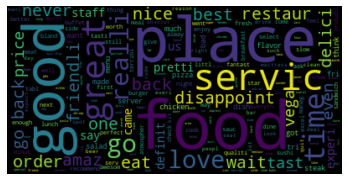

In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = ' '.join(corpus)
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Creating the Bag of Words model

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)#max_features- most frequent words(kinda extra cleaning)(here max no of frequently used words in the review), don,t enter the parameter at first try different numbers
X = cv.fit_transform(corpus).toarray()#toarray() was used to change the matrix to array
y = dataset.iloc[:, -1].values

In [9]:
len(X[0]) #to find the number for max_features parameter

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Splitting the dataset into the Training set and Test set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Training the Naive Bayes model on the Training set

In [32]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting the Test set results

In [33]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

## Making the Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[55 42]
 [12 91]]


0.73